In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import pandas as pd
from pandas import DataFrame
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import random_correlation
from IPython.display import IFrame
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
# Files to load
data2load="smi_ig.csv"
data2load2="smi_youtube.csv"

 # read data and store in pandas
df_i = pd.read_csv(data2load)
df_y=pd.read_csv(data2load2)


Top 1000 Influencers include celebrities with large followings to niche content creators with a loyal following on YouTube, Instagram, Facebook, and Twitter.They are categorized in tiers (mini,mega), based on their number of followers.

Businesses pursue people who aim to lessen their consumption of advertisements, and are willing to pay their influencers more.

Market Researchers find that influencer selection extends into product personality. This product and benefit matching is key. For a shampoo, it should use an influencer with good hair.

In [8]:


df_i=pd.read_csv('smi_ig.csv')
df_y=pd.read_csv('smi_youtube.csv')
df_i.head()


,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [9]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [10]:
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df
    

# instagram and youtube data set

In [11]:
df_i.head(2)
# instagram dataset

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K


In [12]:
df_y.head(2)
# youtube dataset


,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN


# munging

In [13]:
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)

df_y.rename({'Subscribers':'Followers',},axis=1,inplace=True)

In [14]:
df_i.head(2)

,Influencer insta name,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K


In [15]:
df_y.head(2)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN


In [16]:
df_i.isnull().sum()

Influencer insta name         0
instagram name               21
Category                    108
category_2                  713
Followers                     0
Audience Country             14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [17]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            277
Followers             0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [18]:
df_i.drop_duplicates(subset=['Influencer insta name'],inplace=True)

In [19]:
df_i.shape

(997, 8)

In [20]:
df_i.drop(labels=['Influencer insta name','Authentic engagement\r\n'],axis=1,inplace=True)

In [21]:
df_i.head(2)

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K


In [22]:
li=['Followers','Engagement avg\r\n']


In [23]:
change(df_i,li)

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,885.5K,8200000.0,885500.0


## Engagement rate : the Percentage of Followers who truly engage with the content posted by Influencers 
## High ER means your content is making an impact on audience
## 2- The higher the engagement ,the more likely it is that the content will be boosted newfeed, garnering more view/followers/subscribers.

##### Engagement Rate formula:
    ER=(Engagement Average/total Followers)*100

In [24]:
df_i['Engagement Rate']=np.round((df_i['newEngagement avg\r\n']/df_i['newFollowers'])*100,3)

In [25]:
print(df_i['Followers'].str[-1].unique())

['M']


In [26]:
# for convenice 
df_i['newFollowers']=df_i['newFollowers']/1000000

In [27]:
df_i.drop(labels=['Engagement avg\r\n','newEngagement avg\r\n'],axis=1,inplace=True)

In [28]:
df_i.head(5)

,instagram name,Category,category_2,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,NaN,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,NaN,11.1M,Indonesia,11.1,27.928


In [117]:
#df_i.groupby(["instagram name",'Engagement Rate']).apply(lambda d:pd.Series(stats.pearsonr(d.C, d.D), index=["corr", "pval"]))

# 15 most followed celebrities on  instagram

In [29]:
df_i.sort_values(by='newFollowers',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

,instagram name,Category,Followers,Engagement Rate
0,Instagram,Photography,487.2M,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,1.668
2,Kylie 🤍,Fashion,323.3M,3.805
3,Leo Messi,Sports with a ball,315.4M,1.680
4,Selena Gomez,Music,308.2M,1.428
5,therock,Cinema & Actors/actresses,307M,0.129
6,Ariana Grande,Music,302.3M,1.356
7,Kim Kardashian,Fashion,296.4M,0.978
8,Beyoncé,Music,246.9M,1.499
9,Khloé Kardashian,Clothing & Outfits,230.2M,0.521


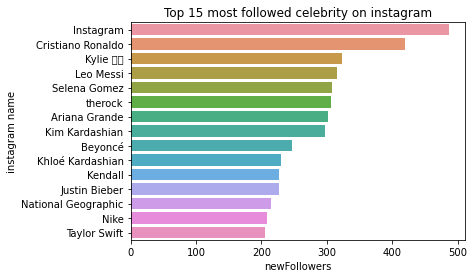

In [30]:
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='instagram name',x='newFollowers',data=df_i.sort_values(by='newFollowers',ascending=False).head(15))

In [31]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [32]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

##  Categories most followed on instagram.  Music is # 1

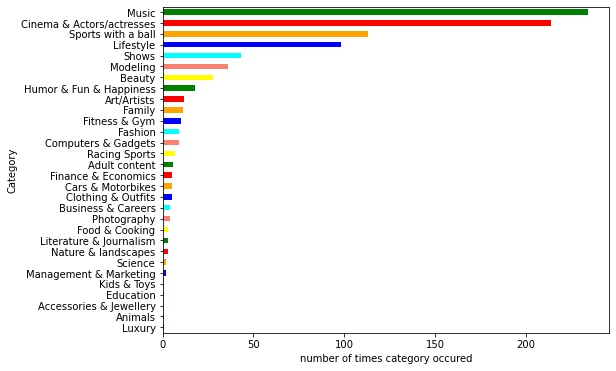

In [33]:
plot(df_i)
    

## Categories most followed on Youtube.  Music is #1

In [34]:
df_y.drop_duplicates(subset=['channel name'],inplace=True)

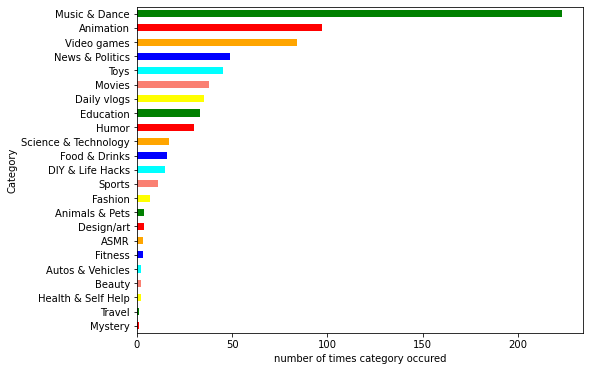

In [35]:
plot(df_y)

# conclusion:
###  Music dominates both.  These numbers correlate with top streams from spotify


# From a merketing perspective - artists (and co.) could use this info to decide where and how to target audiences with ads.

In [36]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

## TOP consumer countries of the influencers content on INSTAGRAM

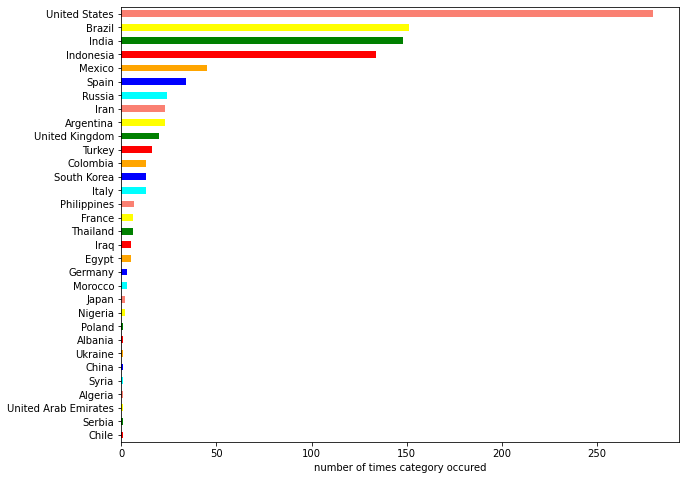

In [37]:
plot_c(df_i)

## TOP consumer countries of the influencers content on YOUTUBE

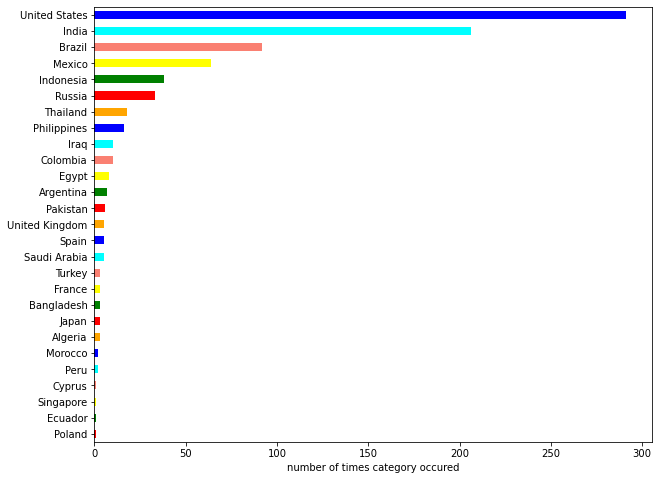

In [38]:
plot_c(df_y)

## Checking the demand for categories by Country

In [39]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)


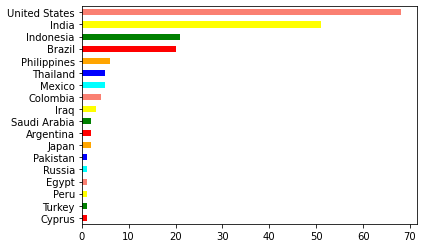

In [41]:
demand(df_y,'Music & Dance')

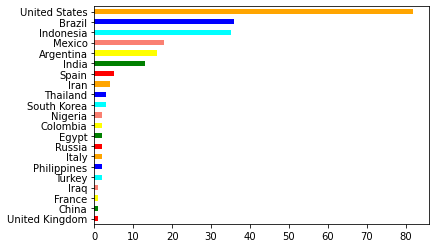

In [42]:
demand(df_i,'Music')

## For a sepecific category we can choose the country where a there is a huge online presence


# TOP 15 most followed channels on  youtube

In [43]:
df_y.iloc[0:10,[1,2,3]]
# youtube dataset is already sorted

,channel name,Category,Followers
0,T-Series,Music & Dance,212.1M
1,Cocomelon - Nursery Rhymes,Education,132.1M
2,SET India,NaN,130.4M
3,PewDiePie,Animation,111.4M
4,MrBeast,Video games,92.5M
5,✿ Kids Diana Show,Animation,92.4M
6,Like Nastya,Animation,90.1M
7,WWE,Video games,86.9M
8,Zee Music Company,Music & Dance,82.7M
9,Vlad and Niki,Toys,80.4M


In [44]:
ly=['Followers','avg views', 'avg likes', 'avg comments']

### Mini followers for advertisement on instagram

In [45]:
df_i['newFollowers'].describe()

count    997.000000
mean      25.539619
std       40.586338
min        2.600000
25%        9.000000
50%       14.600000
75%       26.500000
max      487.200000
Name: newFollowers, dtype: float64

In [47]:
df_i['newFollowers'].quantile(0.94)

61.623999999999995

#### 80million as threshhold

In [48]:
df_i.head(2)

,instagram name,Category,category_2,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270


## Mini influencers 

In [75]:
def for_mini_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<80]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [76]:
for_mini_followers_instagram('United States','Music')

,instagram name,Followers,Engagement Rate
968,MAKE OUT HILL,20.2M,102.970
954,Wilbur Soot,3.2M,27.597
727,NaN,8M,26.250
466,NaN,3.7M,18.641
248,Doja Cat,22.4M,17.411
...,...,...,...
681,Nick Jonas,32.3M,0.721
460,Justin Timberlake,64.2M,0.674
149,Britney Spears,40.2M,0.626
306,French Montana,24.5M,0.619


## Mega influencers

In [68]:
def for_mega_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>80]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [69]:
for_mega_followers_instagram('United States','Music')

,instagram name,Followers,Engagement Rate
111,badgalriri,125.1M,3.677
133,BILLIE EILISH,101.7M,3.343
372,Cardi B,127.2M,2.594
126,Beyoncé,246.9M,1.499
814,Selena Gomez,308.2M,1.428
87,Ariana Grande,302.3M,1.356
630,Miley Cyrus,163.8M,0.363
680,Barbie,181.6M,0.339
225,Demi Lovato,128.7M,0.325
435,Jennifer Lopez,200.8M,0.274


In [53]:
df_y.head(3)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21


In [54]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            276
Followers             0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

#### Remove NaN values

In [55]:
df_y.dropna(axis=0,how='any',subset=['avg likes','avg comments']).isnull().sum()

youtuber name         0
channel name          0
Category            215
Followers             0
Audience Country      0
avg views             0
avg likes             0
avg comments          0
dtype: int64

In [56]:
df_y.dropna(axis=0,how='any',subset=['avg likes','avg comments'],inplace=True)

In [57]:
change(df_y,ly)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,newFollowers,newavg views,newavg likes,newavg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000.0,1400000.0,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000.0,30600000.0,1700000.0,67700.0
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163,86900000.0,76600.0,2800.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K,9200000.0,1400000.0,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636,9200000.0,243800.0,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874,9200000.0,296000.0,10200.0,874.0
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58,9200000.0,15200.0,854.0,58.0


In [59]:
df_y[df_y['Audience Country']=='United States']['Category'].value_counts()

Music & Dance           65
Video games             34
Animation               26
Humor                   18
Movies                  17
Science & Technology    10
News & Politics          9
Food & Drinks            8
DIY & Life Hacks         7
Sports                   7
Daily vlogs              4
Animals & Pets           4
Fashion                  4
Education                4
Fitness                  3
Design/art               2
Beauty                   2
Health & Self Help       2
ASMR                     1
Toys                     1
Mystery                  1
Name: Category, dtype: int64

In [60]:
df_y[df_y['Audience Country']=='Brazil'].groupby('Category').get_group('Music & Dance')

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,newFollowers,newavg views,newavg likes,newavg comments
13,CanalKondZilla,Canal KondZilla,Music & Dance,65.5M,Brazil,36.8K,2.3K,153,65500000.0,36800.0,2300.0,153.0
52,gr6explode,GR6 EXPLODE,Music & Dance,37.2M,Brazil,179.6K,11.4K,190,37200000.0,179600.0,11400.0,190.0
149,davidguettavevo,David Guetta,Music & Dance,24M,Brazil,267.4K,8.7K,358,24000000.0,267400.0,8700.0,358.0
267,DanielSaboya,Dan-Sa / Daniel Saboya,Music & Dance,17.8M,Brazil,33.9K,1.6K,20,17800000.0,33900.0,1600.0,20.0
330,AnittaOficial,Anitta,Music & Dance,16.1M,Brazil,316.4K,12.3K,488,16100000.0,316400.0,12300.0,488.0
342,boyceavenue,Boyce Avenue,Music & Dance,15.7M,Brazil,338.5K,8K,355,15700000.0,338500.0,8000.0,355.0
375,portalfitdance,FitDance,Music & Dance,15.1M,Brazil,46.3K,1.3K,23,15100000.0,46300.0,1300.0,23.0
396,CanalTaBombando,LEGENDA FUNK,Music & Dance,14.7M,Brazil,9.3K,529,22,14700000.0,9300.0,529.0,22.0
409,zncoficial,Zé Neto e Cristiano,Music & Dance,14.5M,Brazil,5.3M,44K,643,14500000.0,5300000.0,44000.0,643.0
413,hejproducao,Henrique e Juliano,Music & Dance,14.5M,Brazil,96.8K,4.1K,75,14500000.0,96800.0,4100.0,75.0


In [108]:
df_y['Engagement rate']=round(((df_y['newavg comments']+df_y['newavg likes']+df_y['newavg views'])/df_y['newFollowers'])*100,3)

In [62]:
df_y.head(2)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments,newFollowers,newavg views,newavg likes,newavg comments,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000.0,323700.0,9800.0,290.0,0.157
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21,130400000.0,23600.0,314.0,21.0,0.018


In [63]:
df_y.columns

Index(['youtuber name', 'channel name', 'Category', 'Followers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments',
       'newFollowers', 'newavg views', 'newavg likes', 'newavg comments',
       'Engagement rate'],
      dtype='object')

In [64]:

df_y['newFollowers']=df_y['newFollowers']/1000000

In [65]:
df_y.drop(labels=['avg views', 'avg likes', 'avg comments','newavg views', 'newavg likes', 'newavg comments',
       ],axis=1,inplace=True)

In [66]:
df_y['newFollowers'].describe()

count    786.000000
mean      17.016921
std       13.593720
min        9.200000
25%       10.700000
50%       13.000000
75%       17.600000
max      212.100000
Name: newFollowers, dtype: float64

In [67]:
df_y['newFollowers'].quantile(0.90)

28.25

### Threshold is up to you
#### I'm using >80M subscribers that is coming the category of mega influencer

In [70]:
df_y.head(1)

,youtuber name,channel name,Category,Followers,Audience Country,newFollowers,Engagement rate
0,tseries,T-Series,Music & Dance,212.1M,India,212.1,0.157


In [71]:
def for_mini_followers_youtube(coun,cat):
    df1=df_y[df_y['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<=80]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [72]:
df_y.groupby('Category')['Audience Country'].first()

Category
ASMR                           Mexico
Animals & Pets          United States
Animation               United States
Autos & Vehicles               Brazil
Beauty                  United States
DIY & Life Hacks               Russia
Daily vlogs                    Mexico
Design/art              United States
Education                       India
Fashion                 United States
Fitness                 United States
Food & Drinks           United States
Health & Self Help      United States
Humor                   United States
Movies                          India
Music & Dance                   India
Mystery                 United States
News & Politics                 India
Science & Technology           Brazil
Sports                         Brazil
Toys                           Brazil
Travel                   Saudi Arabia
Video games             United States
Name: Audience Country, dtype: object

In [73]:
for_mini_followers_youtube('United States','Music & Dance')

,youtuber name,Followers,Engagement rate
860,Juice WRLD,10M,79.277
914,Prince Royce,9.6M,74.629
717,YoungBoy Never Broke Again,10.9M,72.458
861,jordanmatter,10M,50.495
607,Migosatl,11.9M,28.876
...,...,...,...
886,htv2channel,9.8M,0.088
790,CJENMMUSIC,10.5M,0.087
960,POPSVIETNAM,9.4M,0.084
505,AtlanticVideos,13.1M,0.076


In [74]:
def for_mega_followers_youtube(coun,cat):
    df1=df_y[df_y['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>80]
    return df1_mini.sort_values(by='Engagement rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    
    

In [77]:
df_y['Category'].value_counts()

Music & Dance           184
Video games              79
Animation                56
News & Politics          45
Movies                   33
Humor                    29
Daily vlogs              27
Toys                     20
Science & Technology     17
Food & Drinks            15
Education                14
DIY & Life Hacks         14
Sports                   11
Fashion                   7
Animals & Pets            4
Design/art                3
ASMR                      3
Fitness                   3
Health & Self Help        2
Beauty                    2
Travel                    1
Autos & Vehicles          1
Mystery                   1
Name: Category, dtype: int64

In [78]:
df_y.corrwith(df_i)

newFollowers      -0.022447
Engagement Rate         NaN
Engagement rate         NaN
dtype: float64

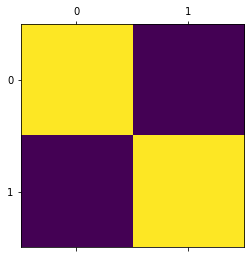

In [82]:
plt.matshow(df_i.corr())
plt.show()

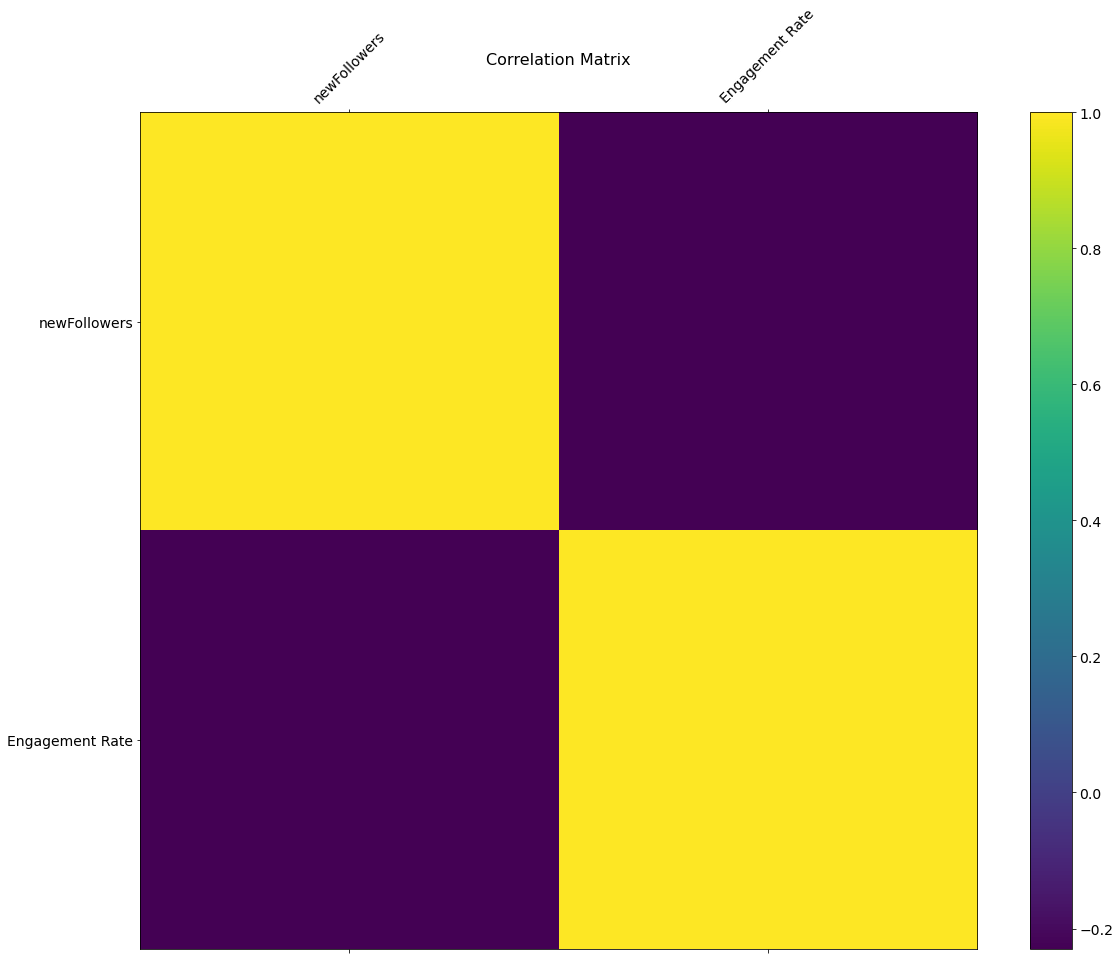

In [84]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_i.corr(), fignum=f.number)
plt.xticks(range(df_i.select_dtypes(['number']).shape[1]), df_i.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_i.select_dtypes(['number']).shape[1]), df_i.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

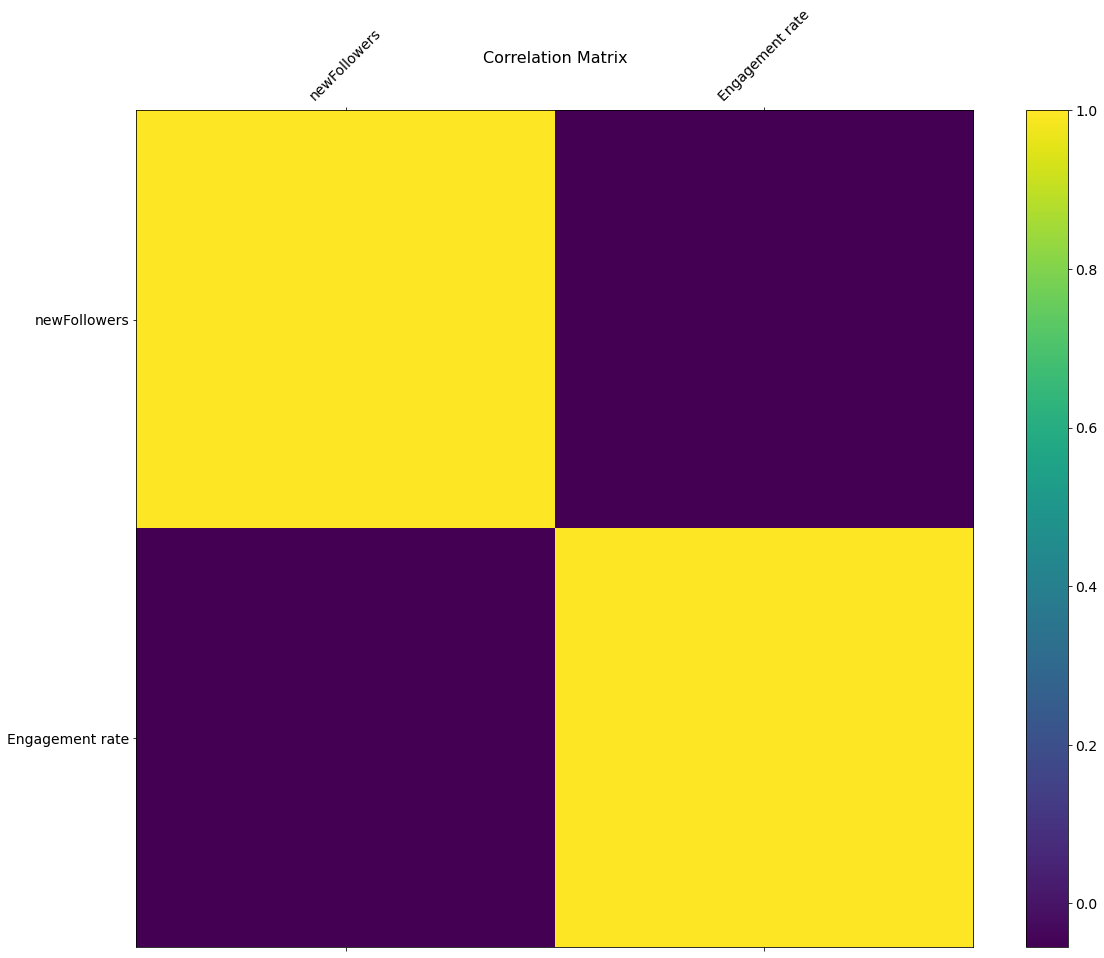

In [86]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_y.corr(), fignum=f.number)
plt.xticks(range(df_y.select_dtypes(['number']).shape[1]), df_y.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_y.select_dtypes(['number']).shape[1]), df_y.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [87]:
rs=np.random.RandomState(0)
df_i=pd.DataFrame(rs.rand(10,10))
corr=df_i.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


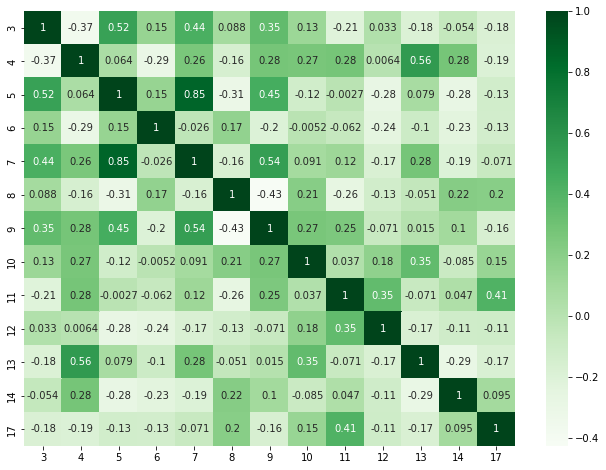

In [100]:
rs = np.random.RandomState(0)
df_i = pd.DataFrame(rs.rand(18, 18))
df_i= df_i.iloc[: , [3,4,5,6,7,8,9,10,11,12,13,14,17]].copy()
corr = df_i.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [93]:
rs=np.random.RandomState(0)
df_y=pd.DataFrame(rs.rand(8,8))
corr=df_y.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,0,1,2,3,4,5,6,7
0,1.000000,-0.600168,0.203801,-0.460696,-0.545885,0.154316,-0.079198,-0.517103
1,-0.600168,1.000000,-0.044257,0.718952,0.342598,0.501312,0.148994,0.905774
2,0.203801,-0.044257,1.000000,-0.311331,0.279100,0.350149,-0.610326,-0.378506
3,-0.460696,0.718952,-0.311331,1.000000,0.271334,0.233142,0.079611,0.740583
4,-0.545885,0.342598,0.279100,0.271334,1.000000,0.182575,-0.285831,0.058072
5,0.154316,0.501312,0.350149,0.233142,0.182575,1.000000,-0.164485,0.250832
6,-0.079198,0.148994,-0.610326,0.079611,-0.285831,-0.164485,1.000000,0.389238
7,-0.517103,0.905774,-0.378506,0.740583,0.058072,0.250832,0.389238,1.000000


In [94]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,0,1,2,3,4,5,6,7
0,nan,nan,nan,nan,nan,nan,nan,nan
1,-0.60,nan,nan,nan,nan,nan,nan,nan
2,0.20,-0.04,nan,nan,nan,nan,nan,nan
3,-0.46,0.72,-0.31,nan,nan,nan,nan,nan
4,-0.55,0.34,0.28,0.27,nan,nan,nan,nan
5,0.15,0.50,0.35,0.23,0.18,nan,nan,nan
6,-0.08,0.15,-0.61,0.08,-0.29,-0.16,nan,nan
7,-0.52,0.91,-0.38,0.74,0.06,0.25,0.39,nan


In [101]:
corrMatrix =df_i.corr()
corrMatrix.to_csv('sm_zscaled_correlation_matrix.csv');
html = corrMatrix.style.background_gradient(cmap='RdBu').set_precision(2).render()

# Writing the output to a html file.
with open('test.html', 'w') as f:
   print('<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-widthinitial-scale=1.0"><title>Document</title></head><style>table{word-break: break-all;}</style><body>' + html+'</body></html>', file=f)

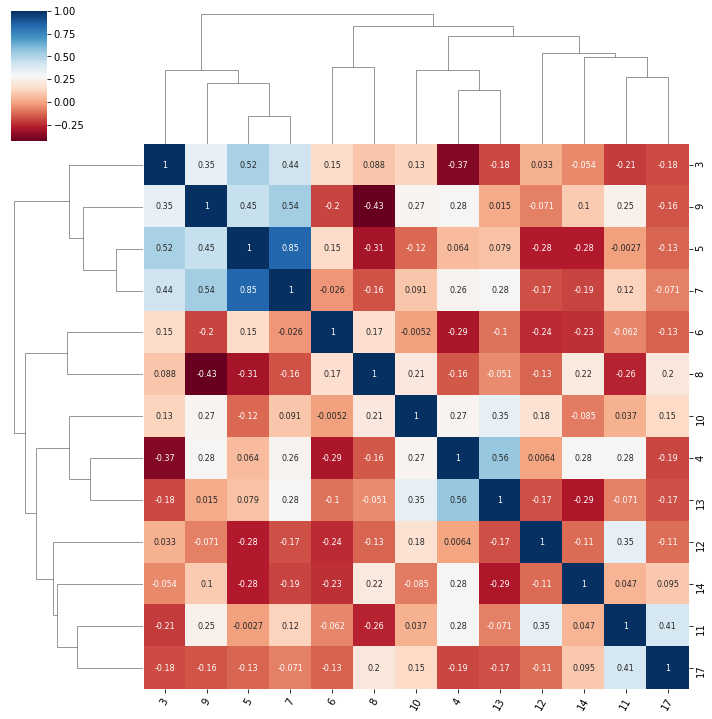

In [102]:


g = sns.clustermap(df_i.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

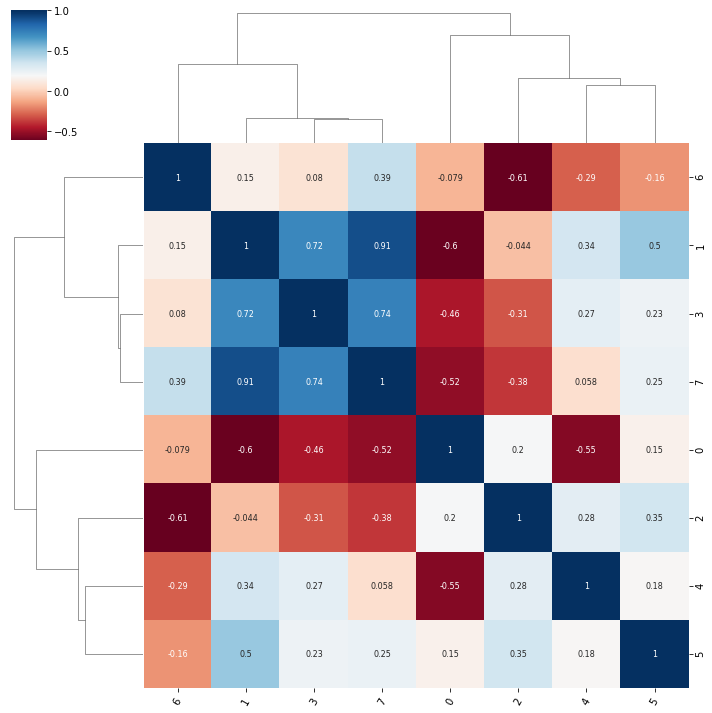

In [104]:

g = sns.clustermap(df_y.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

In [ ]:
corr, _ = pearsonr(list3(xmean=x.mean(dtype=object)), list2(ymean=y.mean(dtype=float64))
#                    #if skipna is None:skipna=True)